# Heart Disease

**Elaborato di progetto di Programmazione di Applicazioni Data Intensive**  

Laurea in Ingegneria e Scienze Informatiche  
DISI - Università di Bologna, Cesena  
A.A. 2018/2019  

Marco Meluzzi  
marco.meluzzi@studio.unibo.it

## Descrizione del problema
Il problema che ci si propone di affrontare si basa sul dataset **_Heart Disease_** reperibile all'interno del repository di Machine Learning dell'Università della California, Irvine (UCI) al seguente link: https://archive.ics.uci.edu/ml/datasets/Heart+Disease.
Il database contiene dati riguardanti la diagnosi di malattie cardiache e si compone dei dati raccolti da quattro diversi autori in altrettanti ospedali, nello specifico:
- Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D. 
- University Hospital, Zurich, Switzerland: William Steinbrunn, M.D. 
- University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D. 
- V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.  

In tutti gli esperimenti che sono stati pubblicati fino ad ora al rigurado, è stato utilizzato unicamente il database di Cleveland; inoltre, benché il database originario si componesse di 76 attributi, le precedenti analisi si sono basate solo sul sottoinsieme dei 14 più significatvi. Pertanto anche in questa sede si è deciso di focalizzare l'attenzione unicamente su questo dataset e su questo sottoinsieme di attributi.

L'obiettivo che ci si pone di raggiungere è quello di rilevare la presenza o meno di una malattia cardiaca nel paziente.

## Reperimento dei dati
- Prima di iniziare si procede con l'importazione dei package necessari che verranno utilizzati

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings; warnings.simplefilter("ignore")

- Configurazione dell'output di _matplotlib_ integrato nel notebook

In [2]:
%matplotlib inline

- Di seguito si riporta il codice per reperire i soli file e dataset che verranno utilizzati, se non già presenti nella directory corrente

In [3]:
import os.path
if not os.path.exists("heart-disease.data"):
    from urllib.request import urlretrieve
    urlretrieve("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", "heart-disease.data")

In [4]:
import os.path
if not os.path.exists("heart-disease.names"):
    from urllib.request import urlretrieve
    urlretrieve("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/heart-disease.names", "info.txt")

- Si converte il dataset appena scaricato in formato CSV

In [5]:
data = pd.read_csv("heart-disease.data", header=None, sep=",")

In [6]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


- Si nota che nel file appena importato non è presente la riga di header, pertanto si inseriscono manualmente i nomi delle colonne, che possono essere letti dal file _info.txt_, contenenete la descrizione generale del problema e dei dataset sopra citati

In [7]:
data.columns = "AGE SEX CP TRESTBPS CHOL FBS RESTECG THALACH EXANG OLDPEAK \
                SLOPE CA THAL DIAGNOSIS".split()
data.head()

,AGE,SEX,CP,TRESTBPS,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,CA,THAL,DIAGNOSIS
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Descrizione delle variabili
- **`AGE`**: età in anni
- **`SEX`**: sesso
    - (1 = maschio, 0 = femmina)
- **`CP`**: tipo di dolore toracico
    - (1 = angina tipica, 2 = angina atipica, 3 = dolore non anginoso, 4 = asintomatico)
- **`TRESTBPS`**: pressione sanguigna a riposo (misurata in mmHg all'ammissione in ospedale)
- **`CHOL`**: colesterolo sierico in mg/dL
- **`FBS`**: livello di glucosio nel sangue a digiuno (glicemia) > 120 mg/dL
    - (1 = vero, 0 = falso)
- **`RESTECG`**: risultati elettrocardiografici a riposo
    - (0 = normale, 1 = con anomalie nel segmento ST-T (inversioni dell'onda T e/o elevazione/depressione dell'onda ST > 0.05 mV), 2 = con probabile o certa ipertrofia ventricolare sinistra secondo i criteri di Estes)
- **`THALACH`**: battito cardiaco massimo raggiunto
- **`EXANG`**: angina indotta da esercizio fisico
    - (1 = sì, 0 = no)
- **`OLDPEAK`**: depressione dell'onda ST indotta dall'esercizio fisico rispetto al riposo
- **`SLOPE`**: pendenza di picco del segmento ST
    - (1 = in salita, 2 = piatta, 3 = in discesa)
- **`CA`**: numero di vasi principali colorati dalla fluoroscopia
    - (da 0 a 3)
- **`THAL`**: talassemia
    - (3 = normale, 6 = difetto permanente, 7 = difetto reversibile)
- **`DIAGNOSIS`: diagnosi cardiologica (stato della malattia angiografica)**
    - (0 = restringimento del diametro < 50%, 1 = restringimento del diametro > 50%, 2 = ..., 3 = ..., 4 = ...)
    - questa è la variabile da predire

- La colonna **`DIAGNOSIS`** rappresenta lo stato della malattia cardiaca del paziente: il suo valore può assumere i valori interi 0, 1, 2, 3, 4. Tuttavia, si può affrontare il problema semplicemente distinguendo la presenza (valori 1, 2, 3, 4) dall'assenza (valore 0) della malattia cardiaca.  


- **In questo modo il problema si trasforma in una predizione di variabile discreta trattabile mediante classificazione binaria**
    - 0 = assenza
    - 1 = presenza

- Si trasforma la colonna relativa alla variabile da predire coerentemente a quanto detto sopra

In [8]:
y = data["DIAGNOSIS"]
data["DIAGNOSIS"] = np.where(y > 0, int(1), int(0))

In [9]:
data.head()

,AGE,SEX,CP,TRESTBPS,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,CA,THAL,DIAGNOSIS
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


- Come si può facilmente verificare, il dataset contiene 303 istanze e 14 feature

In [10]:
data.shape

(303, 14)

## Analisi esplorativa

- Si analizza ora la distribuzione dei valori delle varie colonne, verificando che corrisponda a quanto dichiarato nelle specifiche del dataset

In [11]:
data["SEX"].value_counts()

1.0    206
0.0     97
Name: SEX, dtype: int64

In [12]:
data["CP"].value_counts()

4.0    144
3.0     86
2.0     50
1.0     23
Name: CP, dtype: int64

In [13]:
data["FBS"].value_counts()

0.0    258
1.0     45
Name: FBS, dtype: int64

In [14]:
data["RESTECG"].value_counts()

0.0    151
2.0    148
1.0      4
Name: RESTECG, dtype: int64

In [15]:
data["EXANG"].value_counts()

0.0    204
1.0     99
Name: EXANG, dtype: int64

In [16]:
data["SLOPE"].value_counts()

1.0    142
2.0    140
3.0     21
Name: SLOPE, dtype: int64

In [17]:
data["CA"].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: CA, dtype: int64

In [18]:
data["THAL"].value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: THAL, dtype: int64

In [19]:
data["DIAGNOSIS"].value_counts()

0    164
1    139
Name: DIAGNOSIS, dtype: int64

- Come si può vedere, esistono alcuni valori ignoti che sono rappresentati con il simbolo `?`
- Lo si sostituisce con il valore `NaN` in modo da facilitare la gestione dei valori nulli

In [20]:
_ = data.replace("?", np.nan, inplace=True)

In [21]:
data.isnull().sum()

AGE          0
SEX          0
CP           0
TRESTBPS     0
CHOL         0
FBS          0
RESTECG      0
THALACH      0
EXANG        0
OLDPEAK      0
SLOPE        0
CA           4
THAL         2
DIAGNOSIS    0
dtype: int64

- Essendo le istanze contenenti valori nulli trascurabili rispetto al totale, si decide di eliminarle per poter proseguire con l'analisi

In [22]:
data.dropna(inplace=True)

- Si verifica che siano state effettivamente eliminate le 6 righe individuate

In [23]:
data.shape

(297, 14)

- E' possibile vedere i tipi delle colonne assegnati da pandas e la memoria occupata dal DataFrame col metodo `info()`

In [24]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
AGE          297 non-null float64
SEX          297 non-null float64
CP           297 non-null float64
TRESTBPS     297 non-null float64
CHOL         297 non-null float64
FBS          297 non-null float64
RESTECG      297 non-null float64
THALACH      297 non-null float64
EXANG        297 non-null float64
OLDPEAK      297 non-null float64
SLOPE        297 non-null float64
CA           297 non-null object
THAL         297 non-null object
DIAGNOSIS    297 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 65.0 KB


- Sebbene tutti gli attributi siano codificati come numeri, è possibile distinguere tra:
    - Attributi puramente numerici:
        - INTERVALLO: **`TRESTBPS`**, **`CHOL`**, **`THALACH`**, **`OLDPEAK`**
        - RATIO: **`AGE`**
    - Attributi categorici: **`SEX`**, **`CP`**, **`FBS`**, **`RESTECG`**, **`EXANG`**, **`SLOPE`**, **`CA`**, **`THAL`**, **`DIAGNOSIS`**

- Si modifica, quindi, il tipo di questi ultimi attributi rendendoli di tipo intero (`uint8`), visto che sono di tipo categorico e pertanto il loro valore varia in un range molto piccolo e discreto

In [25]:
data[list("AGE SEX CP FBS RESTECG EXANG SLOPE DIAGNOSIS".split())] = \
data[list("AGE SEX CP FBS RESTECG EXANG SLOPE DIAGNOSIS".split())].astype("uint8")
data[list("CA THAL".split())] = \
data[list("CA THAL".split())].astype(str).astype(float).astype("uint8")

- NOTA: in questa fase si sarebbe potuto anche rendere le suddette variabili effettivamente categoriche: questo però non avrebbe permesso l'utilizzo diretto degli algoritmi di learning per la classificazione che verranno utilizzati in seguito, se non applicando precedentemente una binarizzazione ai dati categorici stessi, ad esempio tramite la tecnica del **_One Hot Encoding_**. Questo, oltre alla perdita delle etichette delle colonne, avrebbe comportato un aumento dell'occupazione in memoria del dataset, quindi in definitiva si è deciso di non praticare questa strada. Inoltre, facendo un confronto, si nota che la differenza in termini di occupazione di memoria del dataset con gli attributi categorici e con gli attributi codificati come interi a 8 bit, è pressoché trascurabile

- Si ottiene un DataFrame con gli stessi dati sopra...

In [26]:
data.head()

,AGE,SEX,CP,TRESTBPS,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,CA,THAL,DIAGNOSIS
0,63,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0,6,0
1,67,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3,3,1
2,67,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2,7,1
3,37,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0,3,0
4,41,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0,3,0


- ...ma con occupazione di memoria ridotta di quasi 5 volte

In [27]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
AGE          297 non-null uint8
SEX          297 non-null uint8
CP           297 non-null uint8
TRESTBPS     297 non-null float64
CHOL         297 non-null float64
FBS          297 non-null uint8
RESTECG      297 non-null uint8
THALACH      297 non-null float64
EXANG        297 non-null uint8
OLDPEAK      297 non-null float64
SLOPE        297 non-null uint8
CA           297 non-null uint8
THAL         297 non-null uint8
DIAGNOSIS    297 non-null uint8
dtypes: float64(4), uint8(10)
memory usage: 14.5 KB


- Si definisce ora una funzione per visualizzare in veste grafica le informazioni estratte sopra

In [28]:
def pieplot(x, **options):
    x.value_counts().sort_index().plot.pie(**options)

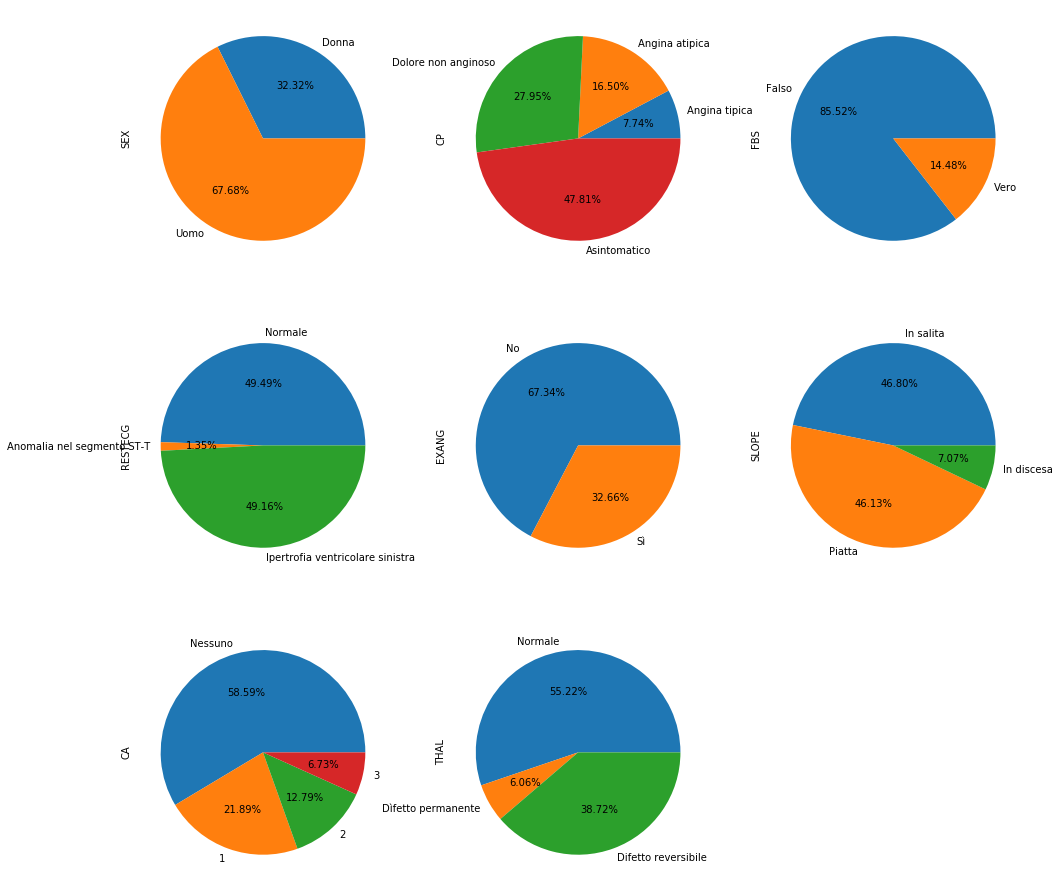

In [29]:
plt.figure(figsize=(16, 16))
pieplot(data["SEX"], ax=plt.subplot(3, 3, 1), 
        labels=["Donna", "Uomo"], autopct=lambda p: "{:.2f}%".format(p))
pieplot(data["CP"], ax=plt.subplot(3, 3, 2), 
        labels=["Angina tipica", "Angina atipica", 
                "Dolore non anginoso", "Asintomatico"], 
        autopct=lambda p: "{:.2f}%".format(p))
pieplot(data["FBS"], ax=plt.subplot(3, 3, 3), 
        labels=["Falso", "Vero"], autopct=lambda p: "{:.2f}%".format(p))
pieplot(data["RESTECG"], ax=plt.subplot(3, 3, 4), 
        labels=["Normale", "Anomalia nel segmento ST-T", 
                "Ipertrofia ventricolare sinistra"], 
        autopct=lambda p: "{:.2f}%".format(p))
pieplot(data["EXANG"], ax=plt.subplot(3, 3, 5), 
        labels=["No", "Sì"], autopct=lambda p: "{:.2f}%".format(p))
pieplot(data["SLOPE"], ax=plt.subplot(3, 3, 6), 
        labels=["In salita", "Piatta", "In discesa"], 
        autopct=lambda p: "{:.2f}%".format(p))
pieplot(data["CA"], ax=plt.subplot(3, 3, 7), 
        labels=["Nessuno", "1", "2", "3"], 
        autopct=lambda p: "{:.2f}%".format(p))
pieplot(data["THAL"], ax=plt.subplot(3, 3, 8), 
        labels=["Normale", "Dìfetto permanente", "Difetto reversibile"], 
        autopct=lambda p: "{:.2f}%".format(p))

- Come si può notare, il problema risulta essere bilanciato, avendo all'incirca lo stesso numero di istanze classificate come 0 (i.e. assenza di malattia cardiaca) e come 1 (i.e. presenza di malattia cardiaca)

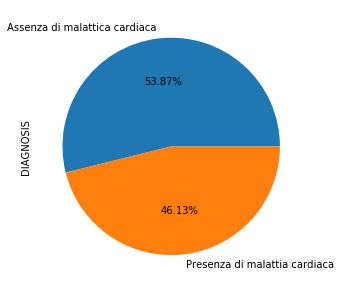

In [30]:
pieplot(data["DIAGNOSIS"], 
        labels=["Assenza di malattica cardiaca", 
                "Presenza di malattia cardiaca"], 
        autopct=lambda p: "{:.2f}%".format(p), figsize=(5,5))

- Si analizzano ora distribuzioni, medie, deviazioni standard e percentili delle feature

In [31]:
data.describe()

,AGE,SEX,CP,TRESTBPS,CHOL,FBS,RESTECG,THALACH,EXANG,OLDPEAK,SLOPE,CA,THAL,DIAGNOSIS
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


- Le distribuzioni delle variabili numeriche sono le seguenti

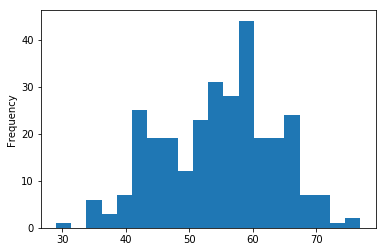

In [32]:
data["AGE"].plot.hist(bins=20)

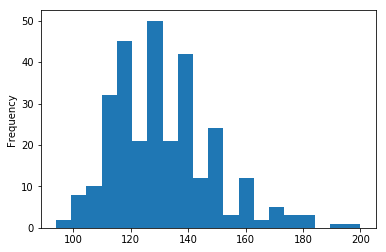

In [33]:
data["TRESTBPS"].plot.hist(bins=20)

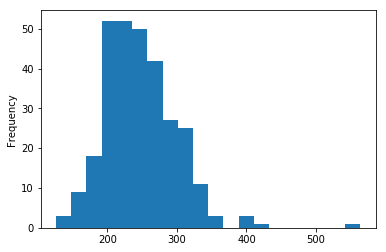

In [34]:
data["CHOL"].plot.hist(bins=20)

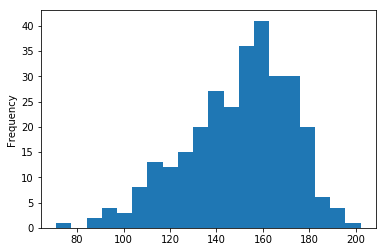

In [35]:
data["THALACH"].plot.hist(bins=20)

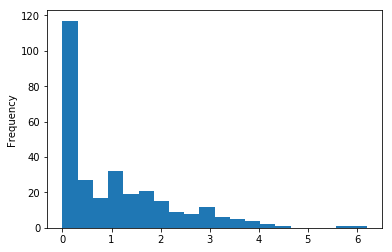

In [36]:
data["OLDPEAK"].plot.hist(bins=20)

## Divisione Training e Validation Set

- Con il dataset preprocessato, è possibile iniziare l'addestramento
- Per prima cosa, si divide casualmente il dataset tramite la funzione `train_test_split()` per ottenere:
    - un training set per l'addestramento dei modelli (contenente 2/3 delle istanze totali)
    - un validation set per la successiva validazione degli stessi (contenente il restante 1/3 delle istanze)
- Per ciascuno creiamo una serie y con la variabile `DIAGNOSIS` da prevedere e un DataFrame X con le variabili utilizzabili per la predizione

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    data.drop(["DIAGNOSIS"], axis=1),   # X = tutte le feature tranne DIAGNOSIS
    data["DIAGNOSIS"],                  # y = DIAGNOSIS
    test_size=1/3, random_state=42      # opzioni
)

- Si può verificare la corretta suddivisione

In [38]:
len(X_train), len(X_val)

(198, 99)

- La suddivisione effettuata continua a essere bilanciata

In [39]:
y_train.value_counts()

0    107
1     91
Name: DIAGNOSIS, dtype: int64

In [40]:
y_val.value_counts()

0    53
1    46
Name: DIAGNOSIS, dtype: int64

## Perceptron

- Si inizia con un'implementazione di base tramite `Perceptron`

In [41]:
from sklearn.linear_model import Perceptron
model = Perceptron()
model.fit(X_train, y_train);

- L'accuratezza di questa predizione risulta essere

In [42]:
model.score(X_val, y_val)

0.5353535353535354

- Si ricorda che, trattandosi di un problema di classificazione, la metrica restituita dal metodo `score()` altro non è che l'_accuratezza_, ovvero la percentuale di esempi di un set di valutazione per cui la classe predetta dal modello coincide con quella nota. Riferendosi alla _matrice di confusione_, tale valore risulta essere la somma dei valori che giaciono sulla diagonale, diviso la totalità dei valori
- Ovviamente il valore ottenuto è molto basso, pressochè equivalente ad una scelta randomica. Si cerca quindi di applicare alcune trasformazioni alle feature

## Parametri del Modello

- I coefficienti trovati dal modello, per cui è moltiplicata ciascuna feature, sono

In [43]:
model.coef_

array([[  615. ,    75. ,   169. ,   784. ,   483. ,    -6. ,    27. ,
        -1267. ,    76. ,   166.9,    39. ,   208. ,   411. ]])

- Dato che le variabili hanno scale diverse, è difficile confrontarne l'importanza

- Si testa, quindi, l'applicazione della standardizzazione delle variabili prima di fornirle al modello, tramite `Pipeline`

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
model = Pipeline([
    ("scaler", StandardScaler()),
    ("model",  Perceptron())
])
model.fit(X_train, y_train)
model.score(X_val, y_val)

0.8787878787878788

- Si può notare un considerevole aumento dell'accuratezza, realizzato grazie alla standardizzazione

- I nuovi valori dei coefficienti, associati alle rispettive colonne, sono i seguenti 

In [45]:
pd.Series(model.named_steps["model"].coef_[0], index=X_train.columns)

AGE        -1.636090
SEX         0.164084
CP          1.609790
TRESTBPS    0.357308
CHOL        0.547867
FBS        -1.341641
RESTECG    -1.714464
THALACH    -3.214592
EXANG       2.194072
OLDPEAK     4.719604
SLOPE       3.090617
CA          6.299759
THAL        5.241051
dtype: float64

## Regolarizzazione

- Nel modello `Perceptron` è possibile applicare diversi tipi di regolarizzazione:
    - la regolarizzazione `l2` aggiunge una penalità ai valori assoluti dei parametri del modello, soprattutto per gestire i valori cosiddetti "estremi" per evitare overfitting. Produce una soluzione _densa_, nel senso che tutte le variabili, seppure in misura diversa, sono considerate dal modello.
    - la regolarizzazione `l1` rende nulli alcuni parametri per scartare le variabili che sono considerate meno necessarie dal modello. Produce, quindi, una _soluzione sparsa_
    - la regolarizzazione `elastic net` è una combinazione delle due sopra

- Si testa un modello applicando la regolarizzazione `l1`, impostando opportunamente il parametro `penalty`

In [46]:
model = Pipeline([
    ("scaler", StandardScaler()),
    ("model",  Perceptron(penalty="l1", alpha=0.001))
])
model.fit(X_train, y_train)
model.score(X_val, y_val)

0.8787878787878788

- I parametri considerati dal modello sono

In [47]:
pd.Series(model.named_steps["model"].coef_[0], index=X_train.columns)

AGE        -1.465253
SEX         2.007267
CP          3.521579
TRESTBPS    0.000000
CHOL        0.000000
FBS        -0.798854
RESTECG     0.000000
THALACH    -4.061532
EXANG       0.472715
OLDPEAK     4.175427
SLOPE       2.742384
CA          4.571950
THAL        2.847198
dtype: float64

- Si vede, quindi, che applicando la regolarizzazione `l1` (con questo valore di `alpha`), i parametri `TRESTBPS`, `CHOL` e `RESTECG` diventano nulli, cioè non vengono considerati dal modello

## Regressione Logistica

- Un altro modello di classificazione binaria che può essere testato è la `LogisticRegression`, che si basa sulla regressione lineare
- Data una variabile y pari a 1 per gli esempi di una classe (presenza) e -1 per quelli dell'altra (assenza), si minimizza la funzione
$$ \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + c)) + 1) $$

In [48]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_val, y_val)

0.8383838383838383

- Anche in questo caso si può testare il modello con la standardizzazione

In [49]:
model = Pipeline([
    ("scaler", StandardScaler()),
    ("model",  LogisticRegression())
])
model.fit(X_train, y_train)
model.score(X_val, y_val)

0.8282828282828283

- In questo modo, la `LogisticRegression` utilizza la regolarizzazione `l2`, però si può impostare `penalty="l1"` per applicare la regolarizzazione `l1`
- Al posto del parametro `alpha` che imposta il peso della regolarizzazione, utilizza il parametro `C` (costo) che imposta il reciproco di tale peso
    - maggiore è `C`, minore sarà la regolarizzazione

In [50]:
model = Pipeline([
    ("scaler", StandardScaler()),
    ("model",  LogisticRegression(penalty="l1", C=0.1))
])
model.fit(X_train, y_train)
model.score(X_val, y_val)

0.8585858585858586

- In questo modello le feature più rilevanti sono

In [51]:
pd.Series(model.named_steps["model"].coef_[0], index=X_train.columns)

AGE         0.000000
SEX         0.104145
CP          0.141341
TRESTBPS    0.016044
CHOL        0.000000
FBS         0.000000
RESTECG     0.000000
THALACH    -0.216182
EXANG       0.179833
OLDPEAK     0.212945
SLOPE       0.000000
CA          0.721811
THAL        0.566220
dtype: float64

## Regressione Logistica con feature polinomiali

- Un ulteriore modo di procedere, utile soprattutto nei casi di scarsa efficacia predittiva, è quello di utilizzare anche delle feature non lineari  

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
model = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression())
])
model.fit(X_train, y_train)
model.score(X_val, y_val)

0.8181818181818182

## Support Vector Machines

- Un altro metodo che vale la pena di testare sono le **_Support Vector Machines_**, che in linea generale può essere più efficace di altri metodi in presenza di training set piccoli
- Sia $ x_i = (x_1, ..., x_n) $ il vettore dell'istanza i-esima
- Sia $ y_i $ la classe di appartenenza di $ x_i $, con $ y_i \in \{-1, 1\} $
    - 1: classe di esempi positivi (i.e. presenza malattia cardiaca)
    - -1: classe di esempi negativi (i.e assenza malattia cardiaca)
- Lo scopo è individuare $ w $ e $ b $ tali che l'iperpiano $ w^Tx + b = 0 $ massimizzi la separazione tra i _support vector_ delle due classi, ovvero i punti vicini al _decision boundary_
- Il classificatore risultante è una funzione lineare $$ f(x_i) = y_i $$ 


$$ \text{dove} y_i = \left\{\begin{array}{lr}wx_i + b >= 0&:\text{1}\\wx_i + b < 0&:\text{-1}\end{array}\right. $$




- Con kernel lineare

In [53]:
from sklearn.svm import SVC
model = Pipeline([
    ("scaler", StandardScaler()),
    ("model",  SVC(kernel="linear"))
])
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [54]:
model.score(X_val, y_val)

0.8484848484848485

- Con kernel _Gaussian Radial Basis_

In [55]:
model = Pipeline([
    ("scaler", StandardScaler()),
    ("model",  SVC(kernel="rbf"))
])
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [56]:
model.score(X_val, y_val)

0.8585858585858586

## Ottimizzazione degli iperparametri

- I modelli appena testati hanno diversi iperparametri che possono influenzarne l'accuratezza
- Finora se ne sono provati alcuni, ma è opportuno utilizzare una _Grid Search_ per testare diverse combinazioni degli iperparametri e trovare quella che fornisce risultati migliori

- Si crea il modello generale per **`Perceptron`**

In [57]:
pm = Pipeline([
    ("scaler", StandardScaler()),
    ("perc",   Perceptron())
])

- Si definisce la griglia di parametri, con i rispettivi valori e intervalli di valori da valutare

In [58]:
grid = {
    "scaler": [None, StandardScaler()],
    "perc__penalty": [None, "l1", "l2", "elasticnet"],
    "perc__alpha": np.logspace(-3, 3, 7) # [0.001, 0.01, ..., 100, 1000]
}

- Si crea un modello **`GridSearchCV`** utilizzando i due oggetti definiti sopra

In [59]:
from sklearn.model_selection import GridSearchCV
gsp = GridSearchCV(pm, grid, iid=True)

- Si addestrano questi valori sul training set

In [60]:
gsp.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('perc', Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=None, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=None,
       param_grid={'scaler': [None, StandardScaler(copy=True, with_mean=True, with_std=True)], 'perc__penalty': [None, 'l1', 'l2', 'elasticnet'], 'perc__alpha': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

- In questo modo viene eseguita una cross validation con 3 fold (valore di default) su tutte le combinazioni di iperparametri
    - ossia i dati vengono suddivisi in 3 insiemi disgiunti, un sottoinsieme è usato come validation set e i rimanenti 2 come training set. Si ripete questo procedimento 3 volte con ciascuno dei 3 sottoinsiemi. Per ogni combinazione di parametri, quindi, l'accuratezza è la media delle accuratezze dei 3 modelli
- Viene addestrato il modello sulla combinazione migliore, trattandosi di un problema di classificazione la metrica su cui si basa di default è l'accuratezza

In [61]:
gsp.score(X_val, y_val)

0.8787878787878788

- Gli iperparametri relativi al modello migliore trovato sono

In [62]:
gsp.best_params_

{'perc__alpha': 0.001,
 'perc__penalty': None,
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}

- I coefficienti associati alle feature sono

In [63]:
pd.Series(gsp.best_estimator_.named_steps["perc"].coef_[0], index=X_train.columns)

AGE        -1.636090
SEX         0.164084
CP          1.609790
TRESTBPS    0.357308
CHOL        0.547867
FBS        -1.341641
RESTECG    -1.714464
THALACH    -3.214592
EXANG       2.194072
OLDPEAK     4.719604
SLOPE       3.090617
CA          6.299759
THAL        5.241051
dtype: float64

- Si possono consultare i risultati dettagliati sulle diverse combinazioni di iperparametri testate
- Si ordina per `rank_test_score` per ottenere in testa i risultati migliori

In [64]:
pd.DataFrame(gsp.cv_results_).sort_values("rank_test_score").head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_perc__alpha,param_perc__penalty,param_scaler,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
9,0.002776,0.000032,0.000962,0.000021,0.01,None,"StandardScaler(copy=True, with_mean=True, with...","{'perc__alpha': 0.01, 'perc__penalty': None, '...",0.835821,0.818182,0.861538,0.838384,0.017728,1,0.847328,0.840909,0.796992,0.828410,0.022370
1,0.003382,0.000309,0.001229,0.000319,0.001,None,"StandardScaler(copy=True, with_mean=True, with...","{'perc__alpha': 0.001, 'perc__penalty': None, ...",0.835821,0.818182,0.861538,0.838384,0.017728,1,0.847328,0.840909,0.796992,0.828410,0.022370
33,0.002667,0.000013,0.000938,0.000001,10,None,"StandardScaler(copy=True, with_mean=True, with...","{'perc__alpha': 10.0, 'perc__penalty': None, '...",0.835821,0.818182,0.861538,0.838384,0.017728,1,0.847328,0.840909,0.796992,0.828410,0.022370
49,0.002665,0.000020,0.000935,0.000004,1000,None,"StandardScaler(copy=True, with_mean=True, with...","{'perc__alpha': 1000.0, 'perc__penalty': None,...",0.835821,0.818182,0.861538,0.838384,0.017728,1,0.847328,0.840909,0.796992,0.828410,0.022370
41,0.002688,0.000003,0.000945,0.000002,100,None,"StandardScaler(copy=True, with_mean=True, with...","{'perc__alpha': 100.0, 'perc__penalty': None, ...",0.835821,0.818182,0.861538,0.838384,0.017728,1,0.847328,0.840909,0.796992,0.828410,0.022370
17,0.003177,0.000255,0.001077,0.000162,0.1,None,"StandardScaler(copy=True, with_mean=True, with...","{'perc__alpha': 0.1, 'perc__penalty': None, 's...",0.835821,0.818182,0.861538,0.838384,0.017728,1,0.847328,0.840909,0.796992,0.828410,0.022370
25,0.003252,0.000083,0.001428,0.000521,1,None,"StandardScaler(copy=True, with_mean=True, with...","{'perc__alpha': 1.0, 'perc__penalty': None, 's...",0.835821,0.818182,0.861538,0.838384,0.017728,1,0.847328,0.840909,0.796992,0.828410,0.022370
5,0.002710,0.000020,0.000966,0.000017,0.001,l2,"StandardScaler(copy=True, with_mean=True, with...","{'perc__alpha': 0.001, 'perc__penalty': 'l2', ...",0.835821,0.787879,0.784615,0.803030,0.023488,8,0.824427,0.825758,0.774436,0.808207,0.023886
7,0.002722,0.000011,0.000938,0.000002,0.001,elasticnet,"StandardScaler(copy=True, with_mean=True, with...","{'perc__alpha': 0.001, 'perc__penalty': 'elast...",0.835821,0.787879,0.784615,0.803030,0.023488,8,0.824427,0.825758,0.774436,0.808207,0.023886
11,0.003971,0.000828,0.001112,0.000154,0.01,l1,"StandardScaler(copy=True, with_mean=True, with...","{'perc__alpha': 0.01, 'perc__penalty': 'l1', '...",0.776119,0.787879,0.815385,0.792929,0.016421,10,0.847328,0.856061,0.766917,0.823435,0.040123


- Si ripetono gli stessi passaggi per la **`Logistic Regression`**

In [65]:
lrm = Pipeline([
    ("scaler", StandardScaler()),
    ("lr",     LogisticRegression())
])
grid = {
    "scaler": [None, StandardScaler()],
    "lr__penalty": ["l2", "l1"],
    "lr__C": np.logspace(-3, 3, 7)
}
gslr = GridSearchCV(lrm, grid, iid=True)
gslr.fit(X_train, y_train)
gslr.score(X_val, y_val)

0.8585858585858586

- Gli iperparametri relativi al modello migliore trovato sono

In [66]:
gslr.best_params_

{'lr__C': 0.01,
 'lr__penalty': 'l2',
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}

- I coefficienti associati alle feature sono

In [67]:
pd.Series(gslr.best_estimator_.named_steps["lr"].coef_[0], index=X_train.columns)

AGE         0.071244
SEX         0.157256
CP          0.155065
TRESTBPS    0.081579
CHOL        0.056168
FBS        -0.037804
RESTECG     0.062778
THALACH    -0.160586
EXANG       0.150917
OLDPEAK     0.161933
SLOPE       0.065891
CA          0.261966
THAL        0.245206
dtype: float64

In [68]:
pd.DataFrame(gslr.cv_results_).sort_values("rank_test_score").head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lr__C,param_lr__penalty,param_scaler,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
5,0.002761,0.000102,0.000948,8.083605e-06,0.01,l2,"StandardScaler(copy=True, with_mean=True, with...","{'lr__C': 0.01, 'lr__penalty': 'l2', 'scaler':...",0.805970,0.863636,0.815385,0.828283,0.025292,1,0.854962,0.856061,0.849624,0.853549,0.002811
9,0.002749,0.000047,0.000947,3.170957e-06,0.1,l2,"StandardScaler(copy=True, with_mean=True, with...","{'lr__C': 0.1, 'lr__penalty': 'l2', 'scaler': ...",0.820896,0.848485,0.815385,0.828283,0.014461,1,0.862595,0.863636,0.857143,0.861125,0.002848
16,0.002143,0.000026,0.000783,2.135440e-06,10,l2,None,"{'lr__C': 10.0, 'lr__penalty': 'l2', 'scaler':...",0.805970,0.863636,0.800000,0.823232,0.028674,3,0.877863,0.848485,0.872180,0.866176,0.012723
15,0.002752,0.000053,0.000948,2.734606e-06,1,l1,"StandardScaler(copy=True, with_mean=True, with...","{'lr__C': 1.0, 'lr__penalty': 'l1', 'scaler': ...",0.805970,0.833333,0.830769,0.823232,0.012389,3,0.870229,0.863636,0.864662,0.866176,0.002897
8,0.001885,0.000010,0.000787,4.545959e-06,0.1,l2,None,"{'lr__C': 0.1, 'lr__penalty': 'l2', 'scaler': ...",0.850746,0.833333,0.784615,0.823232,0.027924,3,0.839695,0.856061,0.864662,0.853472,0.010356
14,0.003612,0.000268,0.000788,6.001122e-06,1,l1,None,"{'lr__C': 1.0, 'lr__penalty': 'l1', 'scaler': ...",0.791045,0.863636,0.815385,0.823232,0.030248,3,0.877863,0.856061,0.864662,0.866195,0.008966
12,0.002107,0.000068,0.000857,8.752903e-05,1,l2,None,"{'lr__C': 1.0, 'lr__penalty': 'l2', 'scaler': ...",0.805970,0.848485,0.815385,0.823232,0.018265,3,0.877863,0.848485,0.879699,0.868682,0.014301
13,0.002828,0.000059,0.000965,2.277393e-05,1,l2,"StandardScaler(copy=True, with_mean=True, with...","{'lr__C': 1.0, 'lr__penalty': 'l2', 'scaler': ...",0.805970,0.848485,0.800000,0.818182,0.021566,8,0.854962,0.863636,0.872180,0.863593,0.007030
25,0.002760,0.000032,0.000943,8.778064e-07,1000,l2,"StandardScaler(copy=True, with_mean=True, with...","{'lr__C': 1000.0, 'lr__penalty': 'l2', 'scaler...",0.791045,0.833333,0.815385,0.813131,0.017400,9,0.862595,0.856061,0.879699,0.866118,0.009967
23,0.002764,0.000013,0.000945,1.561394e-06,100,l1,"StandardScaler(copy=True, with_mean=True, with...","{'lr__C': 100.0, 'lr__penalty': 'l1', 'scaler'...",0.791045,0.833333,0.815385,0.813131,0.017400,9,0.862595,0.856061,0.879699,0.866118,0.009967


- Infine si testa la _Grid Search_ anche su **`Support Vector Machines`**

In [69]:
svm = Pipeline([
    ("scaler", StandardScaler()),
    ("svm",     SVC())
])
grid = {
    "scaler": [None, StandardScaler()],
    "svm__kernel": ["linear", "rbf"],
    "svm__C": np.logspace(-3, 3, 7),
    "svm__gamma": np.logspace(-3, 3, 7)
}
gssvm = GridSearchCV(svm, grid, iid=True)
gssvm.fit(X_train, y_train)
gssvm.score(X_val, y_val)

0.8484848484848485

- Gli iperparametri relativi al modello migliore trovato sono

In [70]:
gssvm.best_params_

{'scaler': None, 'svm__C': 10.0, 'svm__gamma': 0.001, 'svm__kernel': 'linear'}

- I coefficienti associati alle feature sono

In [71]:
pd.Series(gssvm.best_estimator_.named_steps["svm"].coef_[0], index=X_train.columns)

AGE        -0.019249
SEX         1.130462
CP          0.258489
TRESTBPS    0.020086
CHOL        0.006359
FBS        -0.712326
RESTECG     0.209826
THALACH    -0.023259
EXANG       0.536961
OLDPEAK     0.238927
SLOPE       0.200132
CA          0.995067
THAL        0.285389
dtype: float64

In [72]:
pd.DataFrame(gssvm.cv_results_).sort_values("rank_test_score").head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_scaler,param_svm__C,param_svm__gamma,param_svm__kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
66,1.319799,0.717716,0.001177,0.000005,None,10,100,linear,"{'scaler': None, 'svm__C': 10.0, 'svm__gamma':...",0.850746,0.863636,0.830769,0.848485,0.013464,1,0.877863,0.871212,0.872180,0.873752,0.002934
62,1.317334,0.703236,0.001176,0.000002,None,10,1,linear,"{'scaler': None, 'svm__C': 10.0, 'svm__gamma':...",0.850746,0.863636,0.830769,0.848485,0.013464,1,0.877863,0.871212,0.872180,0.873752,0.002934
60,1.314708,0.700694,0.001150,0.000031,None,10,0.1,linear,"{'scaler': None, 'svm__C': 10.0, 'svm__gamma':...",0.850746,0.863636,0.830769,0.848485,0.013464,1,0.877863,0.871212,0.872180,0.873752,0.002934
58,1.319333,0.712252,0.001194,0.000015,None,10,0.01,linear,"{'scaler': None, 'svm__C': 10.0, 'svm__gamma':...",0.850746,0.863636,0.830769,0.848485,0.013464,1,0.877863,0.871212,0.872180,0.873752,0.002934
56,1.329868,0.709656,0.001170,0.000042,None,10,0.001,linear,"{'scaler': None, 'svm__C': 10.0, 'svm__gamma':...",0.850746,0.863636,0.830769,0.848485,0.013464,1,0.877863,0.871212,0.872180,0.873752,0.002934
64,1.305953,0.706408,0.001170,0.000003,None,10,10,linear,"{'scaler': None, 'svm__C': 10.0, 'svm__gamma':...",0.850746,0.863636,0.830769,0.848485,0.013464,1,0.877863,0.871212,0.872180,0.873752,0.002934
68,1.298684,0.703148,0.001189,0.000005,None,10,1000,linear,"{'scaler': None, 'svm__C': 10.0, 'svm__gamma':...",0.850746,0.863636,0.830769,0.848485,0.013464,1,0.877863,0.871212,0.872180,0.873752,0.002934
142,0.003625,0.000315,0.001043,0.000006,"StandardScaler(copy=True, with_mean=True, with...",1,0.01,linear,"{'scaler': StandardScaler(copy=True, with_mean...",0.835821,0.848485,0.830769,0.838384,0.007434,8,0.862595,0.871212,0.879699,0.871169,0.006983
143,0.003024,0.000012,0.001112,0.000003,"StandardScaler(copy=True, with_mean=True, with...",1,0.01,rbf,"{'scaler': StandardScaler(copy=True, with_mean...",0.820896,0.848485,0.846154,0.838384,0.012543,8,0.870229,0.863636,0.849624,0.861163,0.008592
144,0.003620,0.000321,0.001036,0.000004,"StandardScaler(copy=True, with_mean=True, with...",1,0.1,linear,"{'scaler': StandardScaler(copy=True, with_mean...",0.835821,0.848485,0.830769,0.838384,0.007434,8,0.862595,0.871212,0.879699,0.871169,0.006983


## Valutazione dei migliori modelli ottenuti

- Sebbene i risultati ottenuti dai tre modelli principali testati abbiano evidenziato accuratezze simili, si scelgono ora i due modelli ritenuti migliori e su di essi si applicano ulteriori metriche per valutarne più a fondo la bontà ottenuta.
- Nello specifico, si sceglie il modello con rank più alto ottenuto dalla _K-Fold cross validation_ relativamente ai modelli basati su `Perceptron` e `Logistic Regression`

- Confrontando le classi predette da un classificatore su un set di dati con quelle reali, si può ottenere la cosiddetta **_matrice di confusione_**
- Ogni cella in riga $ i $ e colonna $ j $ indica quante istanze della classe $ i $-esima sono state etichettate dal classificatore come di classe $ j $-esima
  - lungo la diagonale ($ i=j $) si hanno le classificazioni corrette, al di fuori gli errori

- E' possibile ottenere facilmente la matrice col metodo `confusion_matrix()`, passando i vettori di classi reali e predette

## Modello 1

 - **`Modello basato su Perceptron (con standardizzazione, senza regolarizzazione, alpha=0.001)`**

In [73]:
from sklearn.metrics import confusion_matrix
y_val_pred = gsp.best_estimator_.predict(X_val)
cm = confusion_matrix(y_val, y_val_pred)

- La matrice di confusione ottenuta per questo modello risulta essere

In [74]:
classes = ["Assenza malattia cardiaca", "Presenza malattia cardiaca"]
pd.DataFrame(cm, index=classes, columns=classes)

,Assenza malattia cardiaca,Presenza malattia cardiaca
Assenza malattia cardiaca,52,1
Presenza malattia cardiaca,11,35


- Dalla cui lettura possiamo dedurre diverse informazioni utili:
    - su 46 pazienti affetti da una qualche malattia cardiaca presenti nel validation set, 35 sono stati etichettati dal modello come realmente tali (veri positivi), mentre 11 sono stati etichettati erroneamente come sani (falsi negativi)
    - su 53 pazienti sani presenti nel validation set, 52 sono i veri negativi, 1 è falso positivo
- Sulla diagonale sono presenti le classificazioni corrette, pertanto è possibile calcolare l'accuratezza direttamente come somma dei valori sulla diagonale diviso la somma complessiva dei valori

In [75]:
cm.diagonal().sum() / cm.sum()

0.8787878787878788

- Che coincide con lo score che questo modello aveva trovato

In [76]:
np.equal(cm.diagonal().sum() / cm.sum(), gsp.best_estimator_.score(X_val, y_val))

True

- Anche se nel caso preso in esame le classi non sono particolarmente sbilanciate, è possibile utilizzare degli indicatori complementari della bontà del modello, sempre sfruttando la matrice di confusione appena ottenuta

- Presa una classe X di riferimento, la **_precision_** relativa a quella classe indica la percentuale di esempi classificati come X che sono realmente tali

In [77]:
absence_precision = cm[0, 0] / cm[:, 0].sum()
absence_precision

0.8253968253968254

In [78]:
presence_precision = cm[1, 1] / cm[:, 1].sum()
presence_precision

0.9722222222222222

- Di contro, la **_recall_** indica la percentuale di esempi realmente di classe X che sono stati rilevati essere tali dal modello

In [79]:
absence_recall = cm[0, 0] / cm[0, :].sum()
absence_recall

0.9811320754716981

In [80]:
presence_recall = cm[1, 1] / cm[1, :].sum()
presence_recall

0.7608695652173914

- Generalmente, tarando il modello per migliorare una delle due metriche, l'altra peggiora
- Esiste un'altra metrica, la **_F1-measure_(X)**, ovvero la media armonica tra _precision_ e _recall_ rispetto ad una classe X
$$ F_1(X) = \frac{2 \cdot P(X)\cdot R(X)}{P(X)+R(X)} $$

- Date due classi A e B, come unica misura della performance si può quindi usare la **_F1-measure_**, che è la media aritmentica della _F1-measure_ di ciascuna classe
$$ F_1 = \frac{F_1(A)+F_1(B)}{2} $$

In [81]:
absence_f1_measure = 2 * absence_precision * absence_recall / (absence_precision + absence_recall)
presence_f1_measure = 2 * presence_precision * presence_recall / (presence_precision + presence_recall)
f1_measure = (absence_f1_measure + presence_f1_measure) / 2
f1_measure

0.8751051303616484

- Per controllare la correttezza delle metriche appena calcolate, si utilizzano le funzioni `precision_score()`, `recall_score()` e `f1_score()` fornite da _scikit-learn_ 
  - il parametro `pos_label` indica la classe di riferimento, di default 1
  - impostando il parametro `average=None` si ottiene un vettore di punteggi per tutte le classi
  - impostando il parametro `average="macro"` si ottiene la loro media

In [82]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [83]:
precision_score(y_val, y_val_pred, pos_label=0)

0.8253968253968254

In [84]:
precision_score(y_val, y_val_pred)

0.9722222222222222

In [85]:
recall_score(y_val, y_val_pred, pos_label=0)

0.9811320754716981

In [86]:
recall_score(y_val, y_val_pred)

0.7608695652173914

In [87]:
f1_score(y_val, y_val_pred, average=None)

array([0.89655172, 0.85365854])

In [88]:
f1_score(y_val, y_val_pred, average="macro")

0.8751051303616484

## Modello 2

- **`Modello basato su Logistic Regression (con standardizzazione, con regolarizzazione l2, C=0.01)`**

In [89]:
from sklearn.metrics import confusion_matrix
y_val_pred = gslr.best_estimator_.predict(X_val)
cm = confusion_matrix(y_val, y_val_pred)

- La matrice di confusione ottenuta per questo modello risulta essere

In [90]:
classes = ["Assenza malattia cardiaca", "Presenza malattia cardiaca"]
pd.DataFrame(cm, index=classes, columns=classes)

,Assenza malattia cardiaca,Presenza malattia cardiaca
Assenza malattia cardiaca,48,5
Presenza malattia cardiaca,9,37


- Dalla quale si possono fare conclusioni analoghe a quelle fatte per il precedente modello analizzato

In [91]:
cm.diagonal().sum() / cm.sum()

0.8585858585858586

- Che coincide con lo score che questo modello aveva trovato

In [92]:
np.equal(cm.diagonal().sum() / cm.sum(), gslr.best_estimator_.score(X_val, y_val))

True

- Usando direttamente _scikit-learn_, si calcolano le restanti metriche

In [93]:
precision_score(y_val, y_val_pred, pos_label=0)

0.8421052631578947

In [94]:
precision_score(y_val, y_val_pred)

0.8809523809523809

In [95]:
recall_score(y_val, y_val_pred, pos_label=0)

0.9056603773584906

In [96]:
recall_score(y_val, y_val_pred)

0.8043478260869565

In [97]:
f1_score(y_val, y_val_pred, average=None)

array([0.87272727, 0.84090909])

In [98]:
f1_score(y_val, y_val_pred, average="macro")

0.8568181818181817

- Si può concludere che il modello migliore trovato su questo problema di classificazione è il **`Modello 1`**
    - **`Accuratezza`** = 87.88%
    - **`F1-measure`** = 0.8751

## Confronto dell'accuratezza dei due modelli

- E' anche possibile procedere confrontando l'accuratezza di questi due modelli per stabilire se la loro differenza sia statisticamente significativa

- Il **`Modello 1`** ha  
    - **`n1`** = 297 (istanze)
    - **`e1`** = 0.12 (errore)
- Il **`Modello 2`** ha  
    - **`n2`** = 297 (istanze)
    - **`e2`** = 0.14 (errore) 

- La differenza da stimare risulta essere:
$$ d_t = d \pm Z_{\alpha/2} \hat\sigma_t $$  
dove:
    - $ d = |e_1 - e_2|$
    - $ Z_{\alpha/2} $ è il valore trovato nella tabella corrispondente alla confidenza che si vuole fissare  


- Sapendo che la _varianza_ si ottiene come segue  
$$ \sigma_t^2 = \sigma_1^2 + \sigma_2^2 \simeq \hat\sigma_1^2 + \hat\sigma_2^2$$  
con
$$ \hat\sigma_i^2 = \frac{e_i(1 - e_i)}{n_i} $$  
e che la confidenza $ 1-\alpha = 0.95 $ e di conseguenza $ Z_{\alpha/2} = 1.96 $, si può calcolare l'intervallo $ d_t $

In [99]:
n1 = n2 = 297
e1 = 0.12
e2 = 0.14
Z = 1.96
d = np.abs(e1 - e2)
sigma_1 = (e1 * (1 - e1)) / n1
sigma_2 = (e2 * (1 - e2)) / n2
sigma = sigma_1 + sigma_2
d_t_left = d - Z * np.sqrt(sigma)
d_t_right = d + Z * np.sqrt(sigma)
"[{}, {}]".format(d_t_left, d_t_right)

'[-0.03406697430444679, 0.07406697430444682]'

- Si può infine concludere che, nonostante il **`Modello 1`** sia leggermente più accurato dell'altro, l'intervallo calcolato contiene lo zero, quindi **la differenza tra le accuratezze dei due modelli non è statisticamente significativa**